## Grid Effects and Numerical Accuracy

Load dependencies

In [1]:
using PerlaTonettiWaugh 

┌ Info: Recompiling stale cache file C:\Users\Arnav Sood\.julia\compiled\v1.0\PerlaTonettiWaugh\Zi3ee.ji for PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1190


In [2]:
using LinearAlgebra, Compat, Statistics

Define parameters and run one experiment

In [103]:
# Grid spacing 
z_max = 10.
z_grid = unique([range(0., 0.1, length = 400)' range(0.1, 1., length = 400)' range(1., z_max, length = 100)'])

# Define common objects. 
d_0 = 3.07
d_T = 2.5019
params = (ρ = 0.02, σ = 3.9896, N = 10, θ = 4.7060, γ = 1.0010, κ = 0.0103, ζ = 1, η = 0, Theta = 1, χ = 0.4631, υ = 0.0775, μ = 0, δ = 0.053) # Baselines per Jesse. 
# time 0 vs T parameters objects 
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T

# Stationary solutions
time0_numerical = stationary_numerical(params_0, z_grid) 
time0_algebraic = stationary_algebraic(params_0)
timeT_numerical = stationary_numerical(params_T, z_grid)
timeT_algebraic = stationary_algebraic(params_T);

In [105]:
println("The time 0 growth rates are (numerical: $(time0_numerical.g), algebraic: $(time0_algebraic.g))")
println("The time T growth rates are (numerical: $(timeT_numerical.g), algebraic: $(timeT_algebraic.g))")

The time 0 growth rates are (numerical: 0.010435198880955277, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.020125979771741208, algebraic: 0.019884191437130466)


In [106]:
@show timeT_numerical.λ_ii
@show timeT_algebraic.λ_ii

timeT_numerical.λ_ii = 0.7581650464648105
timeT_algebraic.λ_ii = 0.7564251825341319


0.7564251825341319

## Iterating over z_max

Load deps

In [107]:
using Plots

In [108]:
z_maxes = range(5., 15., step = 1.)
plots = []

for z_max in z_maxes
    z_grid = unique([range(0., 0.1, length = 400)' range(0.1, 1., length = 400)' range(1., z_max, length = 100)'])
    time0_numerical = stationary_numerical(params_0, z_grid) 
    time0_algebraic = stationary_algebraic(params_0)
    timeT_numerical = stationary_numerical(params_T, z_grid)
    timeT_algebraic = stationary_algebraic(params_T)
    println("The time 0 growth rates are (numerical: $(time0_numerical.g), algebraic: $(time0_algebraic.g))")
    println("The time T growth rates are (numerical: $(timeT_numerical.g), algebraic: $(timeT_algebraic.g))")
    p = plot(z_grid, time0_numerical.v_tilde, title = "numerical value function (time 0), z_max = $z_max", label = "")
    plot!(p, [log(time0_numerical.z_hat)], seriestype = "vline", label = "log(z_hat)", lw = 3, legend = :topright)
    push!(plots, p)
end 

The time 0 growth rates are (numerical: 0.010362958002873575, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.020064391645849115, algebraic: 0.019884191437130466)
The time 0 growth rates are (numerical: 0.010394613415918963, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.020092698241650456, algebraic: 0.019884191437130466)
The time 0 growth rates are (numerical: 0.010406542858908435, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.02010240604613349, algebraic: 0.019884191437130466)
The time 0 growth rates are (numerical: 0.010415683843478156, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.020109655858254038, algebraic: 0.019884191437130466)
The time 0 growth rates are (numerical: 0.010425056516565744, algebraic: 0.009231550618829859)
The time T growth rates are (numerical: 0.020117341023753118, algebraic: 0.019884191437130466)
The time 0 growth rates are (numerical: 0.010435198

In [109]:
gr()

Plots.GRBackend()

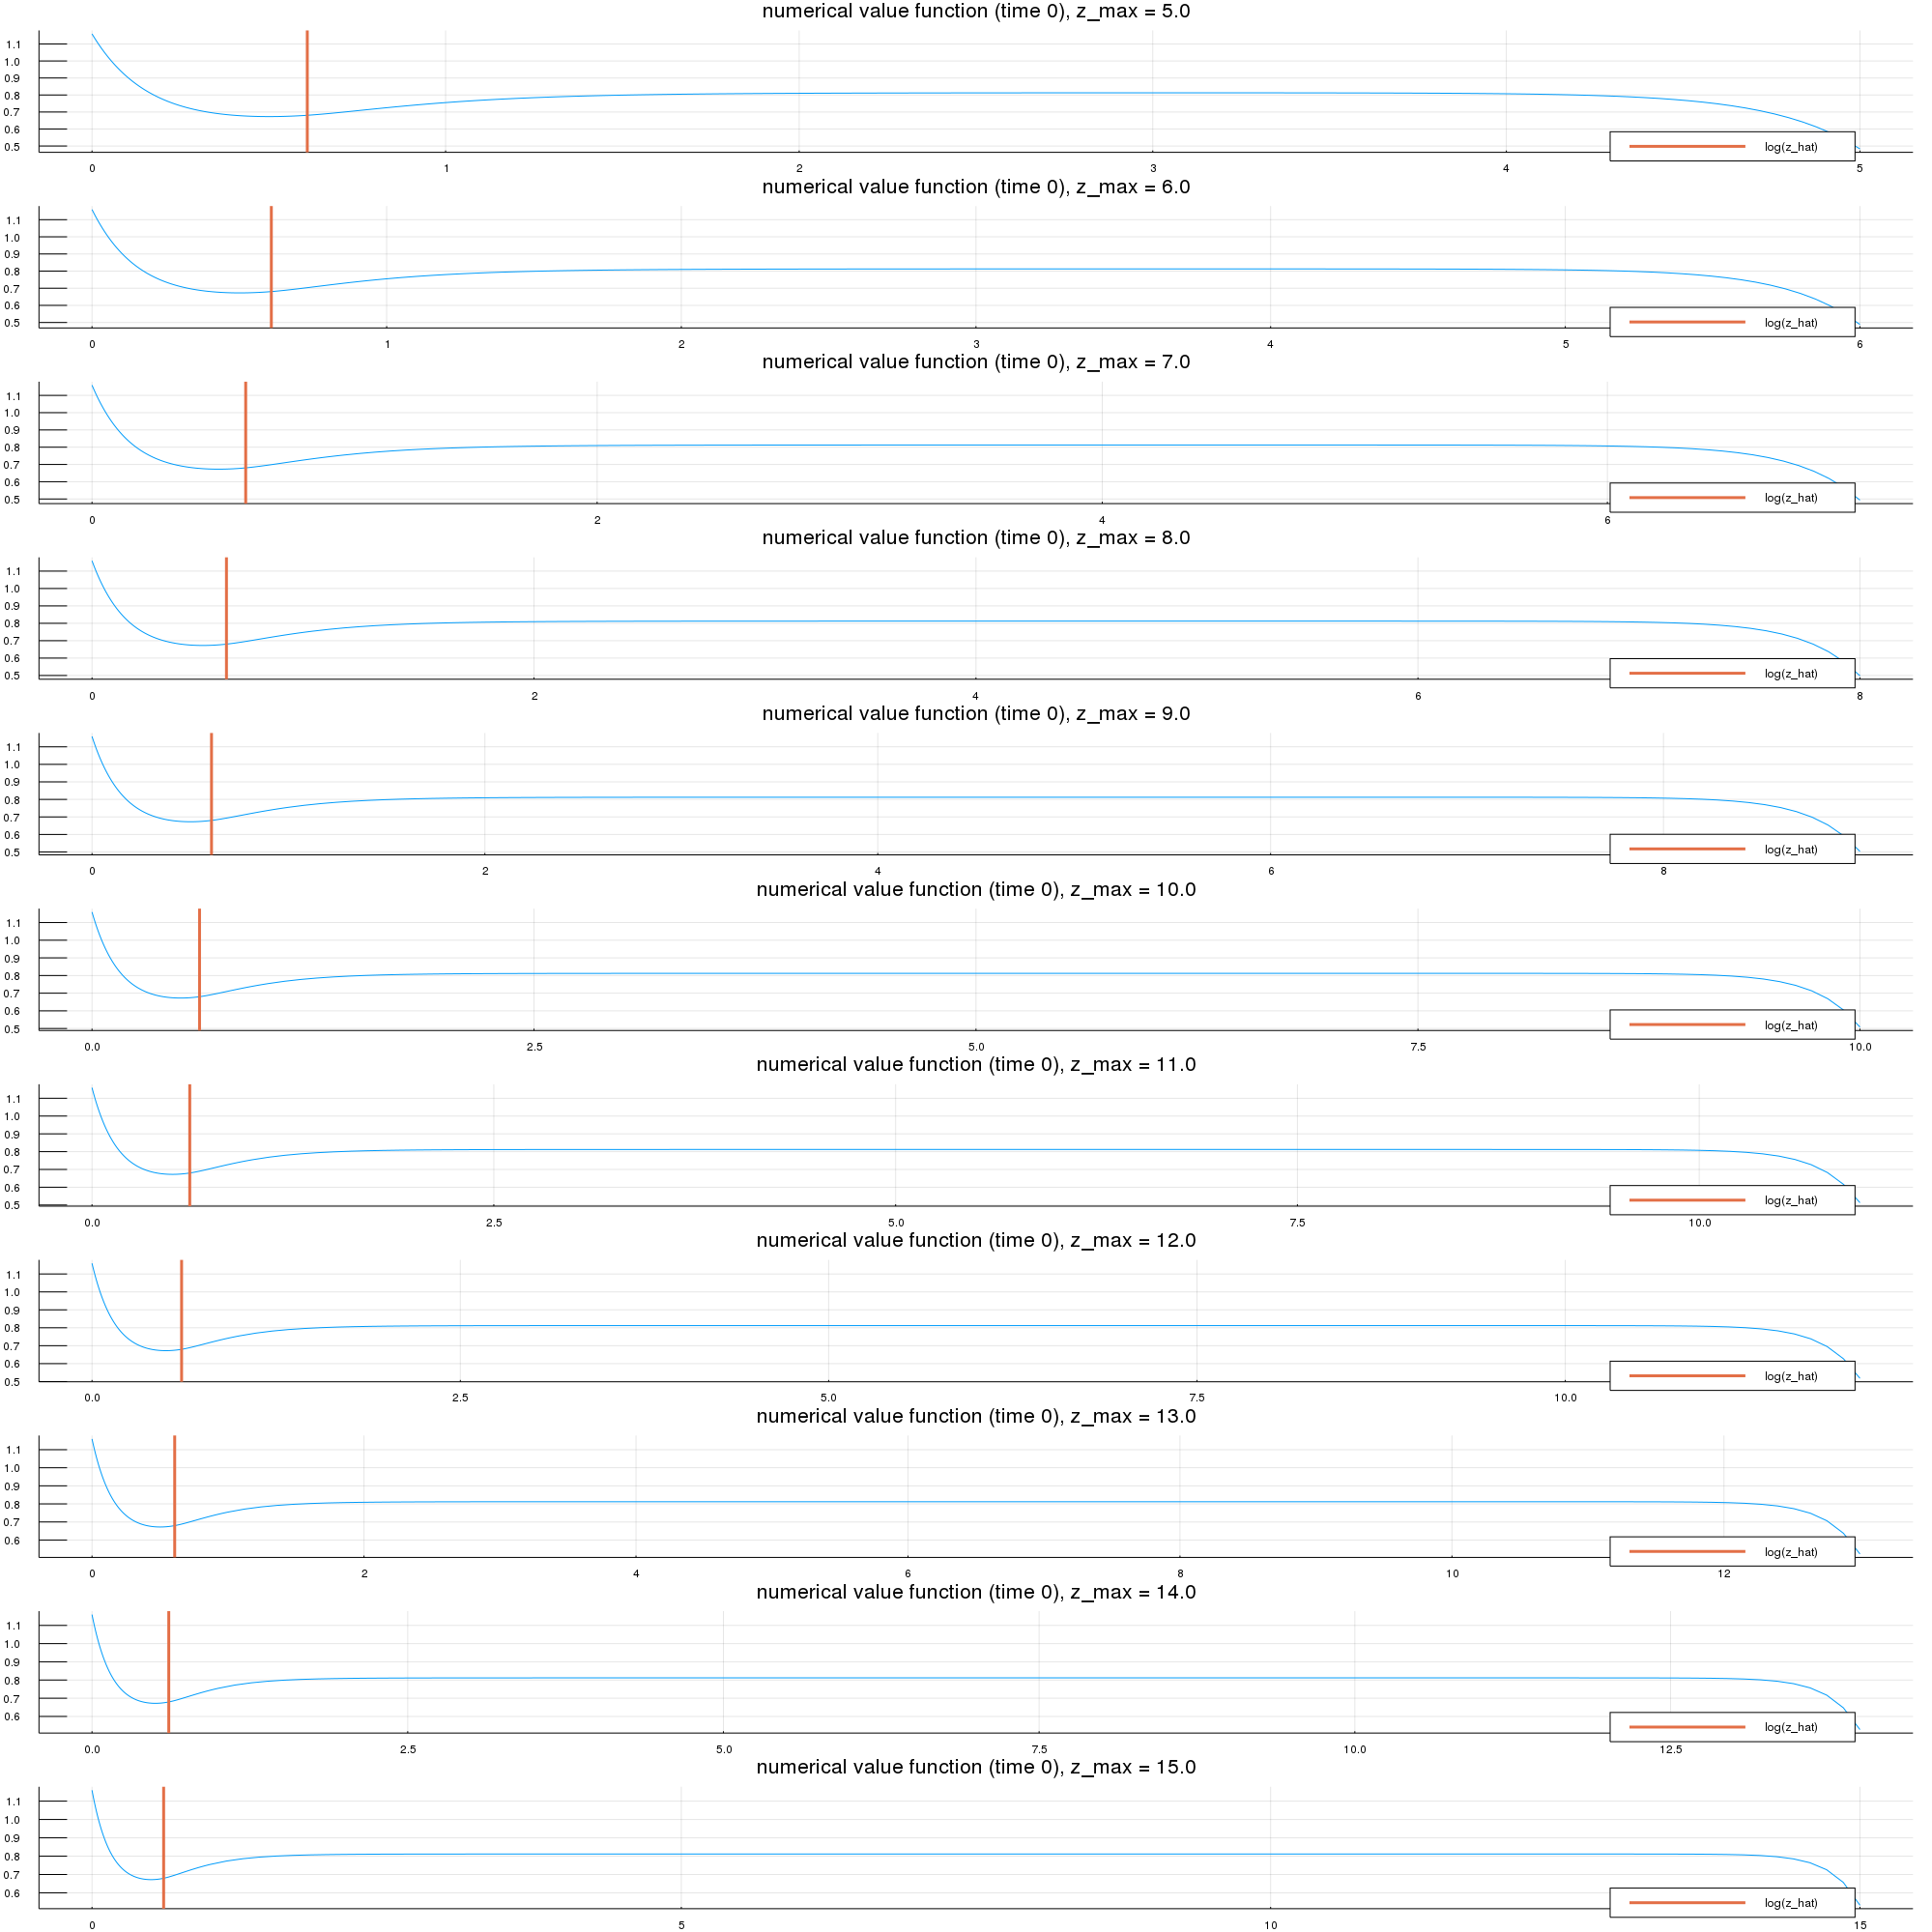

In [110]:
plot(plots..., layout = (length(z_maxes), 1), size = (2000, 2000))

## Home Trade Share Stuff

In [95]:
z_grid;

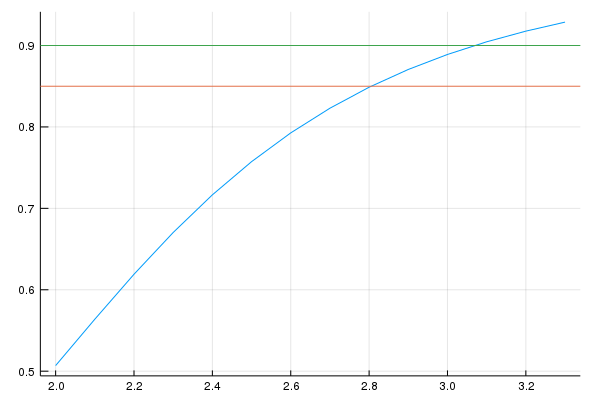

In [98]:
d_0s = 2.:0.1:3.3
plot(d_0s, x -> stationary_numerical(merge(params, (d = x,)), z_grid).λ_ii, label = "")
plot!([0.85], seriestype = "hline", label = "")
plot!([0.9], seriestype = "hline", label = "")

In [101]:
@show stationary_numerical(merge(params, (d = 2.8,)), z_grid).g
@show stationary_numerical(merge(params, (d = 3.07,)), z_grid).g

(stationary_numerical(merge(params, (d = 2.8,)), z_grid)).g = 0.013988491282722152
(stationary_numerical(merge(params, (d = 3.07,)), z_grid)).g = 0.010499030779739536


0.010499030779739536

In [102]:
@show stationary_algebraic(merge(params, (d = 2.8,)), z_grid).g
@show stationary_algebraic(merge(params, (d = 3.07,)), z_grid).g

(stationary_algebraic(merge(params, (d = 2.8,)), z_grid)).g = 0.01295804108219476
(stationary_algebraic(merge(params, (d = 3.07,)), z_grid)).g = 0.009231550618829859


0.009231550618829859